# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# Number of rows and columns (294478, 5)
df.shape

(294478, 5)

**c.** The number of unique users in the dataset.

In [4]:
# Number of unique users.
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [5]:
# 0.119
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# 1965 times are wrong. Control grp saw new page.
df_control_new_page = df.query("group == 'control' & landing_page == 'new_page'")
df_control_new_page.user_id.nunique()

1928

In [7]:
# 1965 times are wrong.Treatment grp saw old page.
df_treatment_old_page = df.query("group == 'treatment' & landing_page == 'old_page'")
df_treatment_old_page.user_id.nunique()

1965

**f.** Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query("group == 'control' & landing_page == 'old_page' | group == 'treatment' & landing_page == 'new_page'")

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [13]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Before removing the duplicate value
df2.shape

(290585, 5)

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

# Check again if the row with a duplicate user_id is deleted or not
df2 = df2.drop_duplicates(subset='user_id', keep="first")

In [16]:
# Check 1
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


In [17]:
# Check 2 
df2.shape

(290584, 5)

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [18]:
p_pop = df2.converted.mean()
p_pop

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2_control = df2.query("group == 'control'")
df2_control.converted.mean()

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df2_treatment = df2.query("group == 'treatment'")
df2_treatment.converted.mean()

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [21]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = df2_treatment.converted.mean() - df2_control.converted.mean()
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [22]:
df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

### Observation:
**It seems for me that the probability for an idividual that they recieved new page is ~50% which means that the randomization/technique used to assign the pages for the customers is fair enough. It seems for me from the initial descriptive statistics that the treatment group has less conversion rate than the control group by 0.15%**

<center>
$Conversion_ {treatment}$ < $Converstion_ {control}$
</center>



<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<center>
$H_{o}$: $P_{old}$ - $P_{new}$ $>=$ $0$
</center>

<center>
$H_{1}$: $P_{old}$ - $P_{new}$ $<$ $0$ 
</center>




### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [23]:
p_new = df2.converted.mean()

In [24]:
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [25]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [26]:
df2_treatment = df2.query("group == 'treatment'")
n_new = df2_treatment.shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [27]:
df2_control = df2.query("group == 'control'")
n_old = df2_control.shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [28]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.binomial(n_new, p_new, size=10000) / n_new
new_page_converted

array([ 0.11953066,  0.12117542,  0.11953066, ...,  0.12015691,
        0.12114101,  0.11783773])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [29]:
# Simulate a Sample for the control Group
old_page_converted = np.random.binomial(n_old, p_old, size=10000) / n_old
old_page_converted

array([ 0.12084062,  0.12110908,  0.11660724, ...,  0.11903713,
        0.11953963,  0.11937442])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [30]:
(new_page_converted - old_page_converted)

array([ -1.30995983e-03,   6.63414303e-05,   2.92341986e-03, ...,
         1.11977609e-03,   1.60138031e-03,  -1.53669726e-03])


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [31]:
# Sampling distribution 
p_diffs = (new_page_converted - old_page_converted)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


>**Tip**: Display title, x-label, and y-label in the chart.

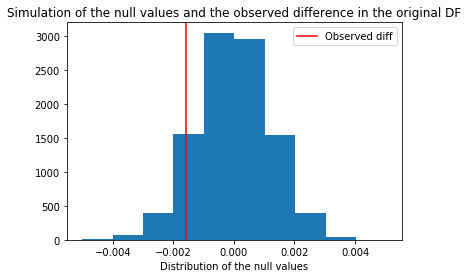

In [32]:
null_hyp_compare = 0.0
null_vals = np.random.normal(0, p_diffs.std(), 10000)
plt.hist(null_vals)
plt.axvline(obs_diff, color = 'red')
plt.title("Simulation of the null values and the observed difference in the original DF")
plt.xlabel("Distribution of the null values")
plt.legend(['Observed diff'])

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [33]:
# We check the intervals that supports the null hypothesis which is that the 
# 𝑃𝑜𝑙𝑑  - 𝑃𝑛𝑒𝑤 < 0 .. so we check null values > obs difference.
(null_vals > obs_diff).mean()

0.90600000000000003

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 
 
 ### Observation:
**P-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. Since the $(p_{value}$ > $0.05$ (Our error rate)) , we **fail to reject null hypothesis and we advice to keep the old design of the page. As the results conducts that the new page is statistically in-signficant**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [34]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
import statsmodels.api as sm

# number of conversions with the old_page
df2_old = df2.query("landing_page == 'old_page' & converted == 1")
convert_old = df2_old.shape[0]

# number of conversions with the new_page
df2_new = df2.query("landing_page == 'new_page'  & converted == 1")
convert_new = df2_new.shape[0]

# number of individuals who were shown the old_page
df2_old_individuals = df2.query("landing_page == 'old_page'")
n_old = df2_old_individuals.shape[0]

# number of individuals who received new_page
df2_new_individuals = df2.query("landing_page == 'new_page'")
n_new = df2_new_individuals.shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [36]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

**Answer** : A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Since the P value is high, we fail to reject the null hypothesis. As well since Z score is less than Z0.05, so we fail to reject the Null Hypothesis.

### Observation:
**The p value is large enough so that it satisfy the statement "Fail to reject null Hypothesis" w.r.t 0.05 Type 1 Error rate**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

### Observation:
**Logistic regression should be used for this case.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
# Check missing values
df2.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [39]:
# Check data types
df2.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [40]:
# Add intercept 
df2['intercept'] = 1

In [41]:
df2[['ab_page_1', 'ab_page_2']] = pd.get_dummies(df2['group'])

In [42]:
df2.drop('ab_page_1', inplace=True, axis=1)

In [43]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page_2
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [44]:
df2.rename(columns={"ab_page_2" : "ab_page"}, inplace=True)

In [45]:
# Check
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [46]:
# Intantiate
log_reg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# Fit
result = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-17 21:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


### Observations:
**P value associated with ab_page is 0.189. So the null can't be rejected as it is above our type 1 error threshold, Since it is bigger than 0.05 - our error rate - we are failing to reject the null since it appears to be not highly significant, The Hypothesis is two sided t-test compated to one sided test in Part II as the new Hypothesis is as below**

<center>

$H_{0}$: $P_{new}$ − $P_{old}$ = $0$
</center>

<center>

$H_{1}$: $P_{new}$ − $P_{old}$ ≠ $0$
</center>




**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Observations:
**It would be better to assure that all the features on the page being tested is kept constant during the experiment for both control and treatment groups. I would also put in consideration the geo location of the individual. Adding additonal terms to the regression model will benefit us to better give predictions. But we have to verify that the Variance Inflation Factor VIF is < 10 as one of the problems that could arise by considering other additional factors may be multicollinearity.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [48]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [49]:
# Check
countries_df.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [50]:
# Join with the df2 dataframe on the user_id column
df_merged = df2.merge(countries_df, on='user_id', how='left')

In [51]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [52]:
# Check
df_merged.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])

In [54]:
# Check 
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [55]:
# Check

print("How many values in column US?", df_merged.US.value_counts())
print("")
print("How many values in column UK?", df_merged.UK.value_counts())
print("")
print("How many values in column CA?", df_merged.CA.value_counts())
print("")

How many values in column US? 1    203619
0     86965
Name: US, dtype: int64

How many values in column UK? 0    218118
1     72466
Name: UK, dtype: int64

How many values in column CA? 0    276085
1     14499
Name: CA, dtype: int64



In [56]:
# Fit your model, and summarize the results
# Have base value as CA

# Intantiate
log_reg_2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK']])

# Fit
result_2 = log_reg_2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [57]:
result_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-17 21:19 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [58]:
np.exp(0.0408), np.exp(0.0506)

(1.0416437559600236, 1.0519020483004984)

In [59]:
np.exp(-0.0149)

0.9852104557227469

### Conclusion:
**Based on the above results, P-value for ab_page is 0.19 and this p-value is quite larger compared to type 1 error so landing page is not statistically significant in predicting if the viewer converts or not. It seems that given the additional data points for country, we still will fail to reject the null hypothesis. US users are 1.04 times more likely to convert as CA users holding all other variables constant. On the other side, UK users are 1.05 times as likely to convert as CA users, holding all other variables constant.**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [60]:
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']

In [61]:
# Fit your model, and summarize the results
# Have base value as CA

# Intantiate
log_reg_interacted = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])

# Fit
result_interacted = log_reg_interacted.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [62]:
result_interacted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-17 21:19 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

### Conclusion:

**Adding the interaction between the columns didn't improve the model, all variables are still insignificant.
Therfore, we have evidence that we fail to reject the null and the old version of the page should be kept.**

### Additional steps: let's include the timestamp to see if it may achieve any good results.

In [63]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,US_ab_page,UK_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


### Observation:

Let's convert the timestamp to only dates.

In [64]:
# Convert timestamp to dates
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'], format="%Y/%m/%d")
df_merged.timestamp = df_merged.timestamp.apply(lambda x: x.date())

In [65]:
df_merged.rename(columns={"timestamp": "date"}, inplace=True)

In [66]:
df_merged.head()

,user_id,date,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,US_ab_page,UK_ab_page
0,851104,2017-01-21,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11,treatment,new_page,0,1,1,US,0,0,1,1,0
3,853541,2017-01-08,treatment,new_page,0,1,1,US,0,0,1,1,0
4,864975,2017-01-21,control,old_page,1,1,0,US,0,0,1,0,0


In [67]:
df_merged.date.max(), df_merged.date.min()

(datetime.date(2017, 1, 24), datetime.date(2017, 1, 2))

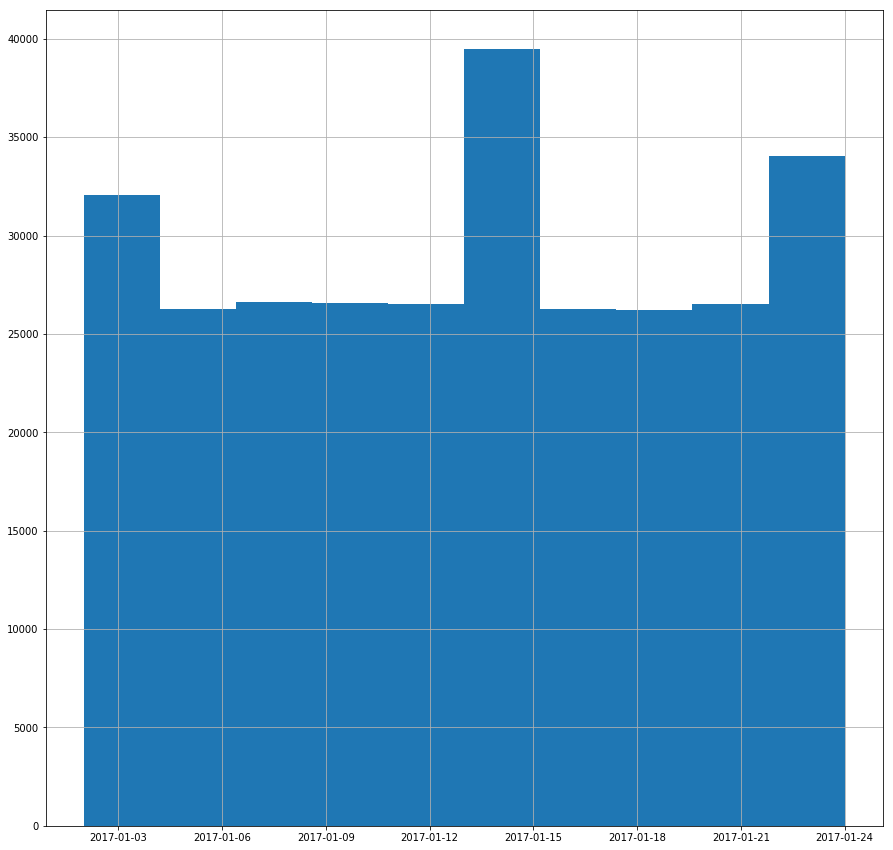

In [68]:
df_merged.date.hist(figsize=(15, 15))

### Observation:
**It seems that the distribution of the date is from the 3rd of Jan 2017 till 24th of Jan 2017. I think we might need to run the experiment for some longer time. The small distribution explain the small observed difference in the control and treatment.**

**idea: However, we can create dummy variables for the dates and see if it will provide higher significance level**

In [69]:
# Create dummy variable

In [70]:
date_dummies = pd.get_dummies(df_merged['date'])
date_dummies.head()

,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,...,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
df_merged = pd.concat([df_merged, date_dummies], axis=1)

In [72]:
df_merged.columns

Index([     'user_id',         'date',        'group', 'landing_page',
          'converted',    'intercept',      'ab_page',      'country',
                 'CA',           'UK',           'US',   'US_ab_page',
         'UK_ab_page',     2017-01-02,     2017-01-03,     2017-01-04,
           2017-01-05,     2017-01-06,     2017-01-07,     2017-01-08,
           2017-01-09,     2017-01-10,     2017-01-11,     2017-01-12,
           2017-01-13,     2017-01-14,     2017-01-15,     2017-01-16,
           2017-01-17,     2017-01-18,     2017-01-19,     2017-01-20,
           2017-01-21,     2017-01-22,     2017-01-23,     2017-01-24],
      dtype='object')

In [73]:
# Drop not necessary columns
df_merged.drop(columns=['country', 'CA', 'US_ab_page', 'UK_ab_page'], axis=1, inplace=True)

In [74]:
# Check
df_merged.head(5)

,user_id,date,group,landing_page,converted,intercept,ab_page,UK,US,2017-01-02,...,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24
0,851104,2017-01-21,control,old_page,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,804228,2017-01-12,control,old_page,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,661590,2017-01-11,treatment,new_page,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,853541,2017-01-08,treatment,new_page,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,864975,2017-01-21,control,old_page,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
# Define Explanatory and response variables
X = df_merged.iloc[:, 5:]
y = df_merged['converted']

In [76]:
# Check X
X.head(5)

,intercept,ab_page,UK,US,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,...,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
# Fit your model, and summarize the results

# Intantiate
log_reg_3 = sm.Logit(df_merged['converted'], X)

# Fit
result_3 = log_reg_3.fit()

Optimization terminated successfully.
         Current function value: 0.366073
         Iterations 6


In [78]:
result_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             No. Iterations:    6.0000     
Dependent Variable:   converted         Pseudo R-squared:  0.000      
Date:                 2022-02-17 21:19  AIC:               212801.6297
No. Observations:     290584            BIC:               213076.7006
Df Model:             25                Log-Likelihood:    -1.0637e+05
Df Residuals:         290558            LL-Null:           -1.0639e+05
Converged:            1.0000            Scale:             1.0000     
----------------------------------------------------------------------
            Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
----------------------------------------------------------------------
intercept  -1.9451 123531.3954 -0.0000 1.0000 -242119.0309 242115.1408
ab_page    -0.0149      0.0114 -1.3071 0.1912      -0.0374      0.0075
UK          0.0509      0.0284  1.7939 0.0728      -0.0047      0.1066
US          0.0408      0.0269  1.5179 0.1290      -0.0119      0.0935
2017-01-02 -0.0555 123531.3954 -0.0000 1.0000 -242117.1413 242117.0304
2017-01-03 -0.1415 123531.3954 -0.0000 1.0000 -242117.2273 242116.9444
2017-01-04 -0.0879 123531.3954 -0.0000 1.0000 -242117.1738 242116.9980
2017-01-05 -0.0899 123531.3954 -0.0000 1.0000 -242117.1758 242116.9960
2017-01-06 -0.0864 123531.3954 -0.0000 1.0000 -242117.1723 242116.9995
2017-01-07 -0.0947 123531.3954 -0.0000 1.0000 -242117.1806 242116.9912
2017-01-08 -0.0831 123531.3954 -0.0000 1.0000 -242117.1690 242117.0028
2017-01-09 -0.0922 123531.3954 -0.0000 1.0000 -242117.1780 242116.9937
2017-01-10 -0.0849 123531.3954 -0.0000 1.0000 -242117.1708 242117.0010
2017-01-11 -0.1101 123531.3954 -0.0000 1.0000 -242117.1960 242116.9758
2017-01-12 -0.0605 123531.3954 -0.0000 1.0000 -242117.1464 242117.0254
2017-01-13 -0.1385 123531.3954 -0.0000 1.0000 -242117.2244 242116.9474
2017-01-14 -0.0532 123531.3954 -0.0000 1.0000 -242117.1390 242117.0327
2017-01-15 -0.1098 123531.3954 -0.0000 1.0000 -242117.1957 242116.9760
2017-01-16 -0.0765 123531.3954 -0.0000 1.0000 -242117.1624 242117.0093
2017-01-17 -0.0343 123531.3954 -0.0000 1.0000 -242117.1202 242117.0516
2017-01-18 -0.0364 123531.3954 -0.0000 1.0000 -242117.1223 242117.0495
2017-01-19 -0.0946 123531.3954 -0.0000 1.0000 -242117.1805 242116.9913
2017-01-20 -0.1150 123531.3954 -0.0000 1.0000 -242117.2009 242116.9709
2017-01-21 -0.0729 123531.3954 -0.0000 1.0000 -242117.1588 242117.0130
2017-01-22 -0.0948 123531.3954 -0.0000 1.0000 -242117.1807 242116.9911
2017-01-23 -0.0496 123531.3954 -0.0000 1.0000 -242117.1355 242117.0362
2017-01-24 -0.0828 123531.3954 -0.0000 1.0000 -242117.1687 242117.0030
======================================================================

"""

## Observation:
The p values of 1 is an indication that this is not a good metrics for our P-value identification.

## A/B tests Conclusion:

**After using different ways to test whether new page increases conversion, it seems as a conclusion for all of the ways that the new page failed to provide better performance/conversion than the old page, and therfore we fail to reject the null hypothesis which means we go with the old page.**

# Machine Learning model experiment using the given dataset
#### idea: Let's see if we can create ML model that can predict whether an individual will convert or not.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [81]:
# Initiate
lgr_clf = LogisticRegression()

# Fit on Training data
lgr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
# Predict
y_preds = lgr_clf.predict(X_test)

In [83]:
set(y_test) - set(y_preds)

{1}

In [84]:
# Score
print("Accuracy is: ", accuracy_score(y_test, y_preds))
print("Recall is: ", recall_score(y_test, y_preds))
print("Precision is: ", precision_score(y_test, y_preds))

Accuracy is:  0.880656595203
Recall is:  0.0
Precision is:  0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
# Confusion Matrix
confusion_matrix(y_test, y_preds)

array([[25591,     0],
       [ 3468,     0]])

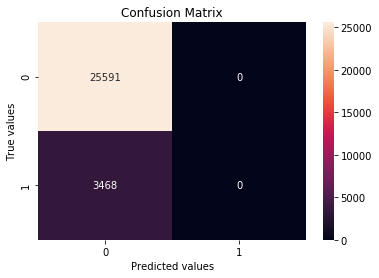

In [86]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

### Observation:
#### The model is predicting eveyrthing to be 0.
1. That's due to imbalanced dataset as we have conversion rate in the original data frame of only **0.11**!
2. That's why accuracy is **0.88**

### Hyperparameter tuning.

In [87]:
#The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as n_samples / (n_classes * np.bincount(y))

lgr_clf_balanced = LogisticRegression(class_weight = 'balanced')

# Fit on Training data
lgr_clf_balanced.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
# Predict
y_preds_balanced = lgr_clf_balanced.predict(X_test)

In [89]:
# Score

print("Accuracy is: ", accuracy_score(y_test, y_preds_balanced))
print("Recall is: ", recall_score(y_test, y_preds_balanced))
print("Precision is: ", precision_score(y_test, y_preds_balanced))

Accuracy is:  0.500808699542
Recall is:  0.505478662053
Precision is:  0.12053080308


In [90]:
# Confusion Matrix
confusion_matrix(y_test, y_preds_balanced)

array([[12800, 12791],
       [ 1715,  1753]])

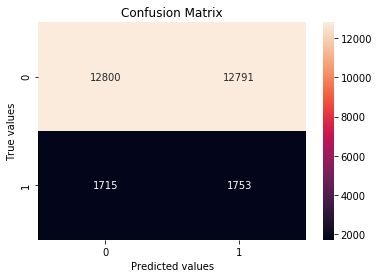

In [91]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_preds_balanced), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

### ML Conclusion:
1. After Hypterparameter tuning, we were able to have more balanced Logistic regression model. However, still it is giving only 50% of Recall and very low precision.

**Points of improvements:-**

1. Try to finetuning more parameters.
2. Try to use more advanced techniques like *Random Forest Classifier* for having better performance for a ML model that can predict whether an individual will be converting to a new page.
3. We can surely, collect more data and more features to have better ML model.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [92]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0